<a href="https://colab.research.google.com/github/ynebin/class2023Fall/blob/main/W13_1124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition model inference with TensorFlow

In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.applications.convnext import ConvNeXtXLarge, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [2]:
# load images
for img_idx in range(7):
  img_url = f"https://raw.githubusercontent.com/ynebin/class2023Fall/main/images/{img_idx}.jpg"
  os.system("curl " + img_url + f" > {img_idx}.jpg")

In [3]:
# load a trained image recognition model provided by TensorFlow
model = ConvNeXtXLarge()

In [4]:
def predict_image_class(image_path):
  # load image
  img = image.load_img(image_path, target_size=(224, 224))

  # draw image
  plt.imshow(img)
  plt.show()

  # convert image to array of numbers
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  # model predicts the output
  predictions = model.predict(img)
  decoded_predictions = decode_predictions(predictions, top=3)[0]  # top 3 predictions

  for i, (id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

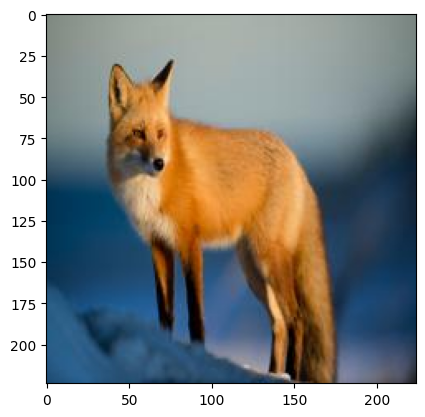

1/1 [==============================] - 19s 19s/step
1: red_fox (0.88)
2: grey_fox (0.04)
3: kit_fox (0.04)


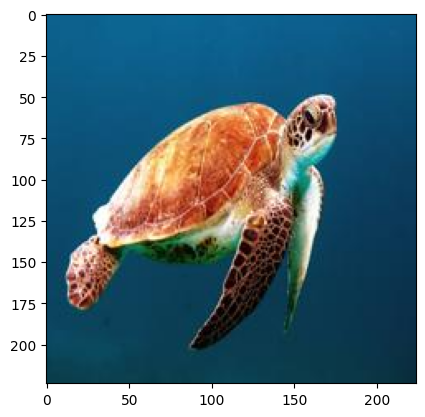

1/1 [==============================] - 14s 14s/step
1: loggerhead (0.53)
2: leatherback_turtle (0.35)
3: terrapin (0.06)


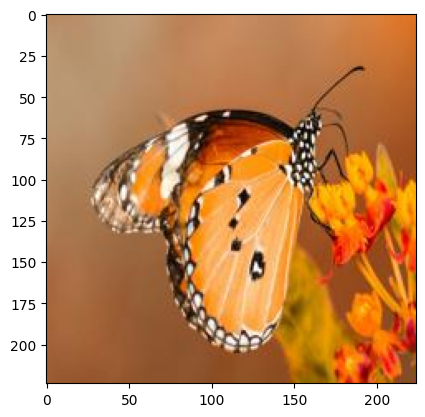

1/1 [==============================] - 15s 15s/step
1: monarch (0.83)
2: lycaenid (0.04)
3: sulphur_butterfly (0.03)


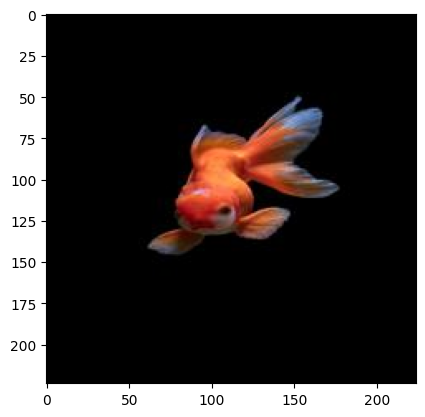

1/1 [==============================] - 13s 13s/step
1: goldfish (0.97)
2: tench (0.00)
3: anemone_fish (0.00)


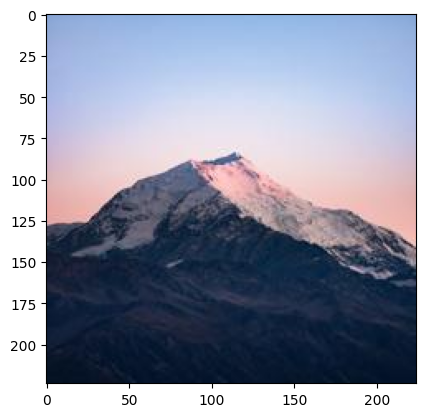

1/1 [==============================] - 14s 14s/step
1: alp (0.45)
2: volcano (0.42)
3: valley (0.01)


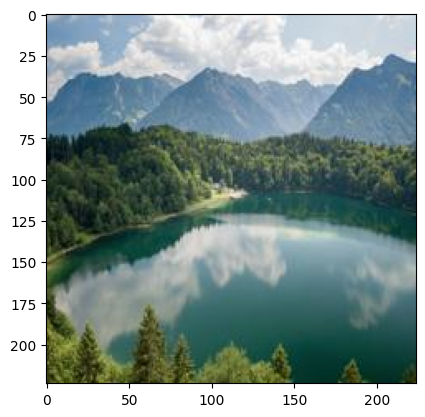

1/1 [==============================] - 11s 11s/step
1: valley (0.37)
2: alp (0.21)
3: lakeside (0.15)


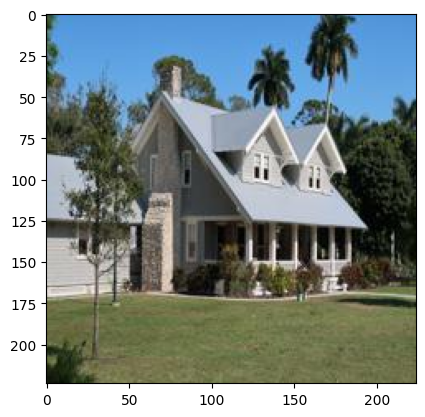

1/1 [==============================] - 10s 10s/step
1: patio (0.87)
2: boathouse (0.02)
3: lakeside (0.01)


In [5]:
for img_idx in range(7):
  predict_image_class(f'{img_idx}.jpg')